In [1]:
# chr10	21995000	22000000 is Sgk1 gene

In [13]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import subprocess
from pandas import DataFrame
from scipy.stats import uniform
from scipy.stats import randint
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import glob
import pathlib

plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi']=300
plt.rcParams['pdf.fonttype']=42

In [14]:
_type = 'Hypo'

In [15]:
_dir = '500_result'

## load

In [16]:
df = pd.read_csv(f'{_dir}/{_type}.DMS.concat.sum.bed', sep = '\t', header= None)
df.columns = ['chrom','start','end',f'Total Sig. {_type} DMS Number']
df = df[df['chrom'] != 'chrY']
df['chrom'].unique()

array(['chr1', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15',
       'chr16', 'chr17', 'chr18', 'chr19', 'chr2', 'chr3', 'chr4', 'chr5',
       'chr6', 'chr7', 'chr8', 'chr9', 'chrX'], dtype=object)

In [17]:
df

,chrom,start,end,Total Sig. Hypo DMS Number
0,chr1,0,500,0
1,chr1,500,1000,0
2,chr1,1000,1500,0
3,chr1,1500,2000,0
4,chr1,2000,2500,0
...,...,...,...,...
5267560,chrX,171029000,171029500,0
5267561,chrX,171029500,171030000,0
5267562,chrX,171030000,171030500,0
5267563,chrX,171030500,171031000,0


/home/qz/miniconda3/envs/allcools/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/qz/miniconda3/envs/allcools/lib/python3.7/site-packages/seaborn/distributions.py:2681: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  color=hist_color, **hist_kws)


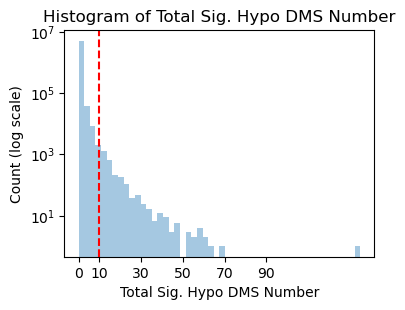

In [18]:
fig, ax = plt.subplots(figsize = (4,3), dpi = 100)
sns.distplot(df[f'Total Sig. {_type} DMS Number'], ax =ax, kde=False, hist_kws={"log": True})
plt.ylabel("Count (log scale)")
plt.title(f"Histogram of Total Sig. {_type} DMS Number")
ax.set_xticks([0, 10, 30,50, 70, 90])
#ax.set_xticks([0, 10, 30,50, 70, 90])
ax.axvline(x = 10, ls = '--', lw = 1.5, c = 'r')
#fig.savefig(f'figure/{_type}.hotspot.distribution.pdf', bbox_tight = 'True')

In [19]:
chr_order = ['chr1', 'chr2', 'chr3', 'chr4', 'chr5','chr6', 'chr7', 
             'chr8', 'chr9','chr10', 'chr11', 'chr12', 'chr13', 'chr14', 
             'chr15','chr16', 'chr17', 'chr18', 'chr19',  'chrX', ]

In [20]:
df['chrom'] = pd.Categorical(df['chrom'], categories=chr_order, ordered=True)
df.sort_values(['chrom', 'start'], inplace=True)

In [21]:
df['chunk_id'] = df['chrom'].astype(str) + '_' +  df['start'].astype(str) + '_' + df['end'].astype(str) 
df['ind'] = range(len(df))

In [9]:
#df[df['chrom'] == 'chr13'].sort_values('Total Sig. Hypo DMS Number', ascending = False).head(10)

## mahattan plot

In [22]:
hotspot_df = df[df[f'Total Sig. {_type} DMS Number'] >= 10]
non_hotspot_df = df[df[f'Total Sig. {_type} DMS Number'] < 10]

In [23]:
hotspot_df.shape

(3519, 6)

In [23]:
# hotspot_df['id'] = range(0, hotspot_df.shape[0])
# hotspot_df['id'] = 'Hyper' + '.' + hotspot_df['id'].astype(str)
# hotspot_df = hotspot_df[['chrom','start','end','id']]
# hotspot_df.to_csv('GAT/Hyper.bed', sep = '\t', header = None, index = None)

In [10]:
#non_hotspot_df = non_hotspot_df.sample(1500000)

In [11]:
hotspot_df_grouped = hotspot_df.groupby(('chrom'))
non_hotspot_df_grouped = non_hotspot_df.groupby(('chrom'))

In [12]:
#non_hotspot_df = non_hotspot_df[non_hotspot_df[f'Total Sig. {_type} DMS Number'] == 0]

In [13]:
#non_hotspot_df_grouped = non_hotspot_df.sample(hotspot_df.shape[0])[['chrom','start','end']]

In [14]:
#non_hotspot_df.to_csv('500_result/non_hotspots.bed', sep = '\t', index = None, header = None)

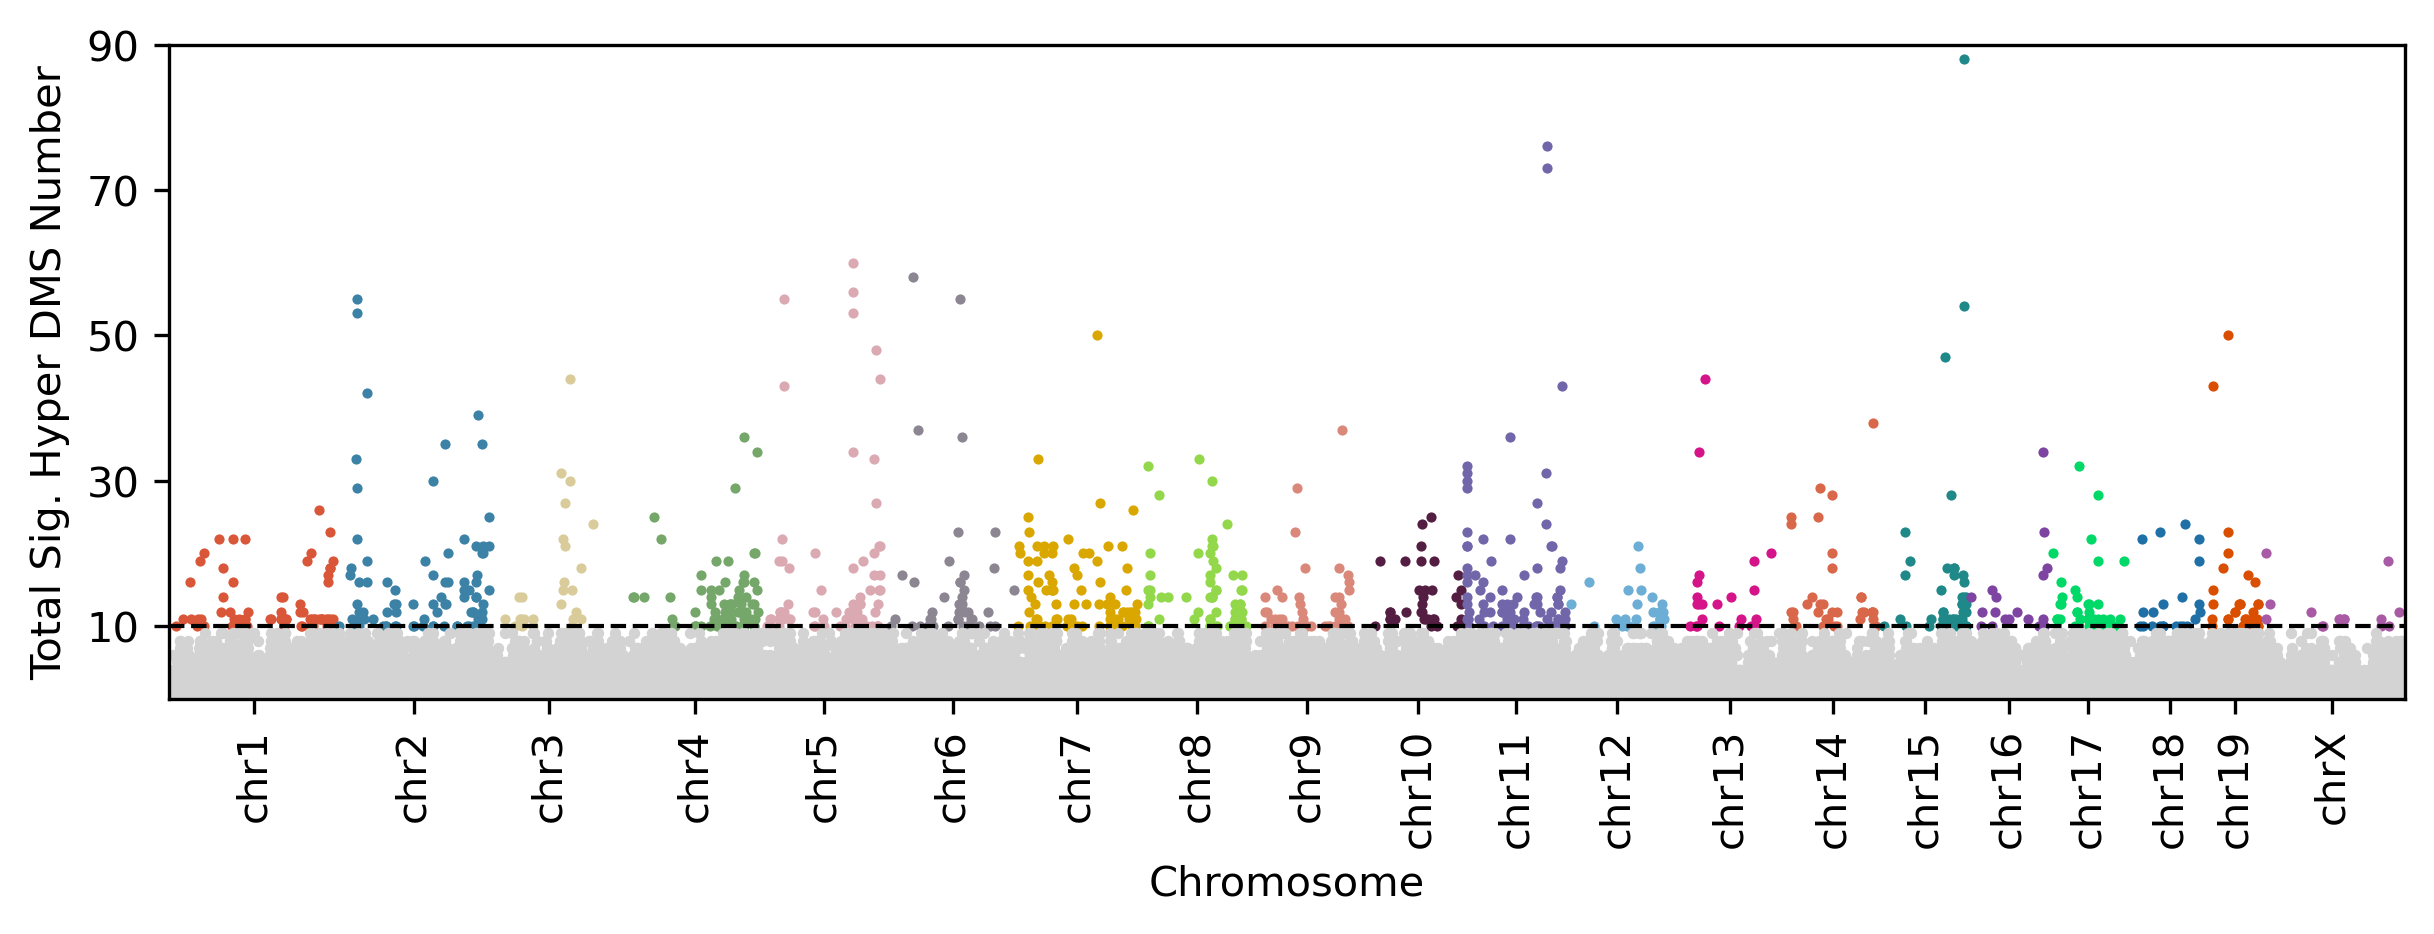

In [15]:
fig = plt.figure(figsize=(8, 3), dpi=300, constrained_layout = True) # Set the figure size
ax = fig.add_subplot(111)
colors = ["#D95638", "#3C82A6", "#DACB9A", "#76A76A", "#DAA9B2",
    "#8B8691", "#DAA700", "#92D84A", "#D9887A", "#541E42",
    "#7066A9", "#6CAED5", "#D41488", "#D9674A", "#1F8888",
    "#7D44A2", "#00D867", "#1E70A6",  "#D94E00" ,"#A95AA4",
   ]

x_labels = []
x_labels_pos = []
for num, (name, group) in enumerate(hotspot_df_grouped):
    group.plot(kind='scatter', x='ind', y=f'Total Sig. {_type} DMS Number',s = 6,linewidth =0 ,
               color=colors[num % len(colors)], ax=ax, rasterized=True)
    x_labels.append(name)
    x_labels_pos.append((group['ind'].iloc[-1] - (group['ind'].iloc[-1] - group['ind'].iloc[0])/2))
    
for num, (name, group) in enumerate(non_hotspot_df_grouped):
    group.plot(kind='scatter', x='ind', y=f'Total Sig. {_type} DMS Number',s = 3,color='#D3D3D3', ax=ax, rasterized=True)
    

ax.set_xticks(x_labels_pos)
ax.set_xticklabels(x_labels, rotation = 90)
# ax.set_yticks([10,30,50,70, 90, 110, 130, 150])
# ax.set_ylim([0, 150])
ax.set_yticks([10,30,50,70, 90])
ax.set_ylim([0, 90])
ax.set_xlim([0, len(df)])
ax.axhline(y = 10, ls = '--', lw = 1, c = 'black')
ax.set_xlabel('Chromosome')

fig.savefig(f'figure/{_type}.hotspot.mahattan.pdf', bbox_inches='tight')
plt.show()

## heatmap

In [15]:
cut_off = 10

In [16]:
hotspot_chunks =  df[df[f'Total Sig. {_type} DMS Number'] >= cut_off]['chunk_id'].tolist()
len(hotspot_chunks)

969

In [17]:
hotspot_bed = df[df[f'Total Sig. {_type} DMS Number'] >= cut_off][['chrom','start','end']]

In [19]:
hotspot_bed.shape

(969, 3)

In [18]:
hotspot_bed.to_csv(f'{_dir}/{_type}.hotspot.bed', sep = '\t', header = None, index = None)

In [24]:
all_ct_df = []
for bed_path in glob.glob(f'500_dms_hotspot/*.{_type}.map.bed'):
    ct = pathlib.Path(bed_path).name.split('.')[0]
    tmpdf = pd.read_csv(bed_path, sep = '\t', header = None)
    tmpdf['chunk_id'] = tmpdf[0] + '-' + tmpdf[1].astype(str) + '-' + tmpdf[2].astype(str)
    tmpdf = tmpdf[tmpdf['chunk_id'].isin(hotspot_chunks)]
    tmpdf = tmpdf.set_index('chunk_id')[[5]]
    tmpdf.columns = [ct]
    all_ct_df.append(tmpdf)

In [25]:
to_plot = pd.concat(all_ct_df, axis = 1)
to_plot.to_csv(f'{_dir}/{_type}.hotspot.ct.csv')

## find example

In [62]:
_type = 'Hypo'
to_plot = pd.read_csv(f'{_dir}/{_type}.hotspot.ct.csv', index_col = 0)

In [73]:
df.sort_values(by = 'Total Sig. Hypo DMS Number', ascending= False)

,chrom,start,end,Total Sig. Hypo DMS Number,chunk_id,ind
1273106,chr13,68173500,68174000,135,chr13-68173500-68174000,3590922
1273275,chr13,68258000,68258500,68,chr13-68258000-68258500,3592266
4100784,chr6,136816500,136817000,63,chr6-136816500-136817000,1770624
2059005,chr17,13546500,13547000,60,chr17-13546500-13547000,4536756
1273662,chr13,68451500,68452000,60,chr13-68451500-68452000,3591771
...,...,...,...,...,...,...
4094147,chr6,133498000,133498500,0,chr6-133498000-133498500,1783860
4094145,chr6,133497000,133497500,0,chr6-133497000-133497500,1783859
4094129,chr6,133489000,133489500,0,chr6-133489000-133489500,1783858
4094136,chr6,133492500,133493000,0,chr6-133492500-133493000,1783857


In [74]:
chunk_id = 'chr15-91709000-91709500'

In [75]:
to_plot.loc[chunk_id]

STR_D1_Sema5a_Gaba            0
Vip_Gaba                      0
MEA-COA_Glut                  0
LDT-PCG-CS_Gata3_Lhx1_Gaba    2
PB_Evx2_Glut                  0
PAG-PPN_Pax5_Sox21_Gaba       0
Astro-NT_NN                   0
Astro-TE_NN                   0
Microglia_NN                  0
CA1-ProS_Glut                 0
L5_IT_CTX_Glut                0
L5_NP_CTX_Glut                0
L23_IT_ENT_Glut               0
L2_IT_PPP-APr_Glut            0
DG_Glut                       0
CEA-BST_Gaba                  0
L6_IT_CTX_Glut                0
L5_ET_CTX_Glut                0
Lamp5_Gaba                    0
MB-MY_Tph2_Glut-Sero          0
CA3_Glut                      0
L6_CT_CTX_Glut                0
L23_IT_PPP_Glut               0
L6bCT_ENT_Glut                0
NP_SUB_Glut                   0
PAG_Glut                      0
MEA-BST_Gaba                  0
Oligo_NN                      0
OPC_NN                        0
ENTmv-PA-COAp_Glut            0
L23_IT_CTX_Glut               0
L45_IT_C

In [51]:
to_plot.shape

(969, 42)

In [37]:
to_plot = to_plot == 0

In [7]:
# row_sums = to_plot.sum(axis=1)  # Calculate row sums
# to_plot_normalized = to_plot.div(row_sums, axis=0) 

In [26]:
# fig,ax = plt.subplots(figsize. )

# sns.heatmap(to_plot,
#             vmin= 0,
#             vmax = 1,
#             xticklabels=False,
#             yticklabels=False,
#             cmap= 'coolwarm')

In [1]:
# sns.clustermap(to_plot,
#                 vmin= 0,
#                vmax = 1,
#                xticklabels=True,
#                yticklabels=False,
#                cmap= 'coolwarm')